# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip install citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

610

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url = url + "appid=" + api_key + "&q=" + city

In [64]:
# for city in cities:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
lat = []
lon = []
temp = []
humidity = []
clouds = []
cities_not_found = []

for city in cities:
    response = requests.get(query_url + city).json()
    if 'coord' in response.keys() and 'main' in response.keys():
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['main']['Clouds']['description'])
        
    else:
        cities_not_found.append(city)
# print(lat)
# print(temp)
# print(cities_not_found)
cities = [city for city in cities if city not in cities_not_found]
len(cities)

KeyError: 'Clouds'

In [34]:
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lon": lon,
    "Temp": temp,
    "Humidity": humidity
}
weather_data = pd.DataFrame(weather_dict)
weather_data
weather_response = requests.get(query_url)
weather_json = weather_response.json()


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#print(f"The weather API responded with: {weather_json}.")
        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weather_data.head()

,City,Lat,Lon,Temp,Humidity
0,hilo,19.73,-155.09,23.35,88
1,bac lieu,9.29,105.72,27.94,83
2,sao filipe,14.90,-24.50,23.64,86
3,eenhana,-17.47,16.33,15.00,54
4,hobart,-42.88,147.33,8.18,61


In [41]:
weather_data.dtypes

City         object
Lat         float64
Lon         float64
Temp        float64
Humidity      int64
dtype: object

In [55]:
check = weather_data.loc[weather_data["Humidity"]>= 100]
check

,City,Lat,Lon,Temp,Humidity
23,dikson,73.51,80.55,1.40,100
46,launceston,-41.45,147.17,6.90,100
97,sao joaquim,-28.29,-49.93,13.13,100
101,benalla,-36.55,145.98,4.01,100
158,bratsk,56.13,101.61,8.94,100
208,tebingtinggi,3.33,99.16,25.00,100
249,mfou,3.72,11.64,21.00,100
305,kushima,31.46,131.23,21.09,100
328,denpasar,-8.65,115.22,24.00,100
365,kloulklubed,7.04,134.26,24.00,100


In [56]:
check2 = weather_data.loc[weather_data["Humidity"]> 100]
check2

,City,Lat,Lon,Temp,Humidity


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [57]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#df.to_csv('file_name.csv')
weather_data.to_csv('city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature Plot 6/9/2020')

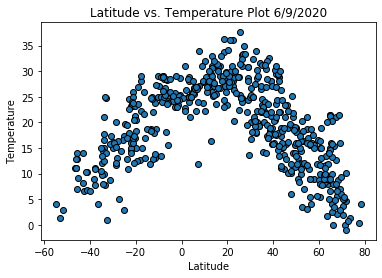

In [58]:
latplot = weather_data["Lat"]
tempplot = weather_data["Temp"]
plt.scatter(latplot, tempplot, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot 6/9/2020")



## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot 6/9/2020')

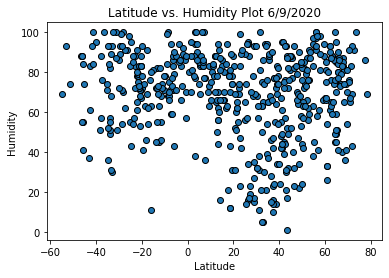

In [59]:
humplot = weather_data["Humidity"]
plt.scatter(latplot, humplot, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot 6/9/2020")


## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression